In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pl.read_csv('data/StudentPerformanceFactors.csv')

display(len(df))
df = df.with_columns(
    pl.when(pl.col("Parental_Involvement") == "High").then(1)
    .when(pl.col("Parental_Involvement") == "Medium").then(0.5)
    .when(pl.col("Parental_Involvement") == "Low").then(0)
    .otherwise(None)  
    .alias("Parental_Involvement") )

df = df.with_columns(pl.when(pl.col('Learning_Disabilities') == 'yes').then(1).otherwise(0).alias('Learning_Disabilities'))
df = df.with_columns(pl.when(pl.col('Family_Income') == 'Low').then(0).when(pl.col('Family_Income') == 'High').then(1).otherwise(0.5).alias('Family_Income'))
df = df.with_columns(pl.when(pl.col('Motivation_Level') == 'Low').then(0).when(pl.col('Motivation_Level') == 'High').then(1).otherwise(0.5).alias('Motivation_Level'))

df = df.with_columns(pl.when(pl.col('Parental_Education_Level') == None).then(0).when(pl.col('Parental_Education_Level') == 'College').then(0.5).otherwise(1).alias('Parental_Education_Level'))
df = df.with_columns(pl.when(pl.col('Gender') == 'Male').then(0).otherwise(1).alias('Gender'))
df = df.with_columns(pl.when(pl.col('School_Type') == 'Public').then(0).otherwise(1).alias('School_Type'))
df = df.with_columns(pl.when(pl.col('Teacher_Quality') == 'Medium').then(0.5).when(pl.col('Teacher_Quality') == "High").then(1).otherwise(0).alias('Teacher_Quality'))
df = df.with_columns(pl.when(pl.col('Extracurricular_Activities') == 'yes').then(1).otherwise(0).alias('Extracurricular_Activities'))
df = df.with_columns(pl.when(pl.col('Access_to_Resources') == 'Medium').then(0.5).when(pl.col('Access_to_Resources') == "High").then(1).otherwise(0).alias('Access_to_Resources'))
df = df.with_columns(pl.when(pl.col('Peer_Influence') == 'Positive').then(1).otherwise(0).alias('Peer_Influence'))
df = df.with_columns(pl.when(pl.col('Internet_Access') == 'Yes').then(1).otherwise(0).alias('Internet_Access'))
df = df.with_columns(pl.when(pl.col('Distance_from_Home') == 'Near').then(1).when(pl.col('Distance_from_Home') == 'Moderate').then(0.5).otherwise(0).alias('Distance_from_Home'))
df = df.filter(pl.col('Exam_Score') <= 75)
df.head()


6607

/tmp/ipykernel_50618/1670508475.py:15: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  df = df.with_columns(pl.when(pl.col('Parental_Education_Level') == None).then(0).when(pl.col('Parental_Education_Level') == 'College').then(0.5).otherwise(1).alias('Parental_Education_Level'))


Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
i64,i64,f64,f64,i32,i64,i64,f64,i32,i64,f64,f64,i32,i32,i64,i32,f64,f64,i32,i64
23,84,0.0,1.0,0,7,73,0.0,1,0,0.0,0.5,0,1,3,0,1.0,1.0,0,67
19,64,0.0,0.5,0,8,59,0.0,1,2,0.5,0.5,0,0,4,0,0.5,0.5,1,61
24,98,0.5,0.5,0,7,91,0.5,1,2,0.5,0.5,0,0,4,0,1.0,1.0,0,74
29,89,0.0,0.5,0,8,98,0.5,1,1,0.5,0.5,0,0,4,0,1.0,0.5,0,71
19,92,0.5,0.5,0,6,65,0.5,1,3,0.5,1.0,0,0,4,0,0.5,1.0,1,70


### parent_Education_Level, techer_Quality, Family_Income, Motivation_Level, Extracurricular_activities, Parental_involvement



In [3]:
Y = df['Exam_Score']
X = df.drop(pl.col('Exam_Score'))
display(Y.head())
display(X.head())

Exam_Score
i64
67
61
74
71
70
71
67
66
69


Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
i64,i64,f64,f64,i32,i64,i64,f64,i32,i64,f64,f64,i32,i32,i64,i32,f64,f64,i32
23,84,0.0,1.0,0,7,73,0.0,1,0,0.0,0.5,0,1,3,0,1.0,1.0,0
19,64,0.0,0.5,0,8,59,0.0,1,2,0.5,0.5,0,0,4,0,0.5,0.5,1
24,98,0.5,0.5,0,7,91,0.5,1,2,0.5,0.5,0,0,4,0,1.0,1.0,0
29,89,0.0,0.5,0,8,98,0.5,1,1,0.5,0.5,0,0,4,0,1.0,0.5,0
19,92,0.5,0.5,0,6,65,0.5,1,3,0.5,1.0,0,0,4,0,0.5,1.0,1


In [4]:
import numpy as np


columns_ = X.columns
correaltion_Exam = np.ones(len(columns_))


for i in range(len(columns_)):
    print(type(df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')))
    correaltion_Exam[i] = df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')
correaltion_Exam.reshape(-1,1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/tmp/ipykernel_50618/3543985388.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correaltion_Exam[i] = df.select(pl.corr('Exam_Score', columns_[i])).to_numpy().astype('float')


array([[ 0.51143727],
       [ 0.67589753],
       [ 0.17551369],
       [ 0.18985413],
       [        nan],
       [-0.01257841],
       [ 0.20142685],
       [ 0.09643025],
       [ 0.06766566],
       [ 0.17400962],
       [ 0.09904546],
       [ 0.08346416],
       [ 0.01188296],
       [ 0.09264805],
       [ 0.04386271],
       [        nan],
       [-0.01733675],
       [ 0.10885235],
       [-0.00736142]])

<Axes: >

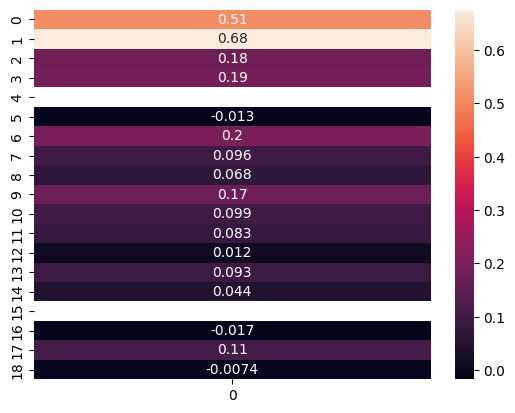

In [5]:

sns.heatmap(correaltion_Exam.reshape(19,-1), annot= True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
model_linearregression = LinearRegression()

In [18]:
model_linearregression.fit(X_train,Y_train)

Y_pred = model_linearregression.predict(X_test)
print(r2_score(Y_pred, Y_test))

[65.62721878 68.49843957 65.79880997 63.830744   65.07163188 65.91266015
 66.03674068 68.07788945 69.26614114 64.76979398 66.06305144 65.38908058
 66.19159186 71.32870107 70.58324406 63.53866607 71.06315464 67.57901945
 65.15411652 63.93369863 63.46481667 72.46102269 66.99474636 70.9632254
 69.37623479 69.84936432 63.6453119  68.28037789 73.55676767 71.28616006
 63.48608793 64.91550612 72.4632636  71.91756683 69.7362541  62.88197593
 70.38082236 63.61508485 62.63875534 67.0369891  68.75661879 66.84968162
 71.76280794 64.45098413 73.11724365 73.45863282 66.41575731 61.89502086
 67.4507698  65.77367062 64.26205501 63.92755008 68.0932401  69.53282544
 66.12483197 69.0881287  68.67119858 64.54831963 67.83865802 63.22886983
 67.00032594 61.9640428  65.48624636 73.23788676 69.58840271 66.38926302
 68.78589338 64.77463801 64.28145193 69.98993621 62.91807512 69.16409865
 69.20065764 68.87463015 67.31134684 74.65577267 71.64038677 64.13060231
 66.93480719 71.39244989 70.03925313 68.62337316 63.

In [9]:
import random 


In [12]:
print(mean_absolute_error(Y_pred, Y_test))
print(r2_score(Y_pred, Y_test))
print(model_linearregression.coef_)

0.5379715668538552
0.956059060506855
[ 2.97094442e-01  2.01061998e-01  1.97732284e+00  2.00201742e+00
  2.22044605e-16  1.07679657e-02  4.94573574e-02  1.03302903e+00
  9.69278078e-01  5.03680312e-01  9.71896671e-01  9.80260158e-01
  5.68302137e-03  7.06593211e-01  2.09870843e-01 -2.22044605e-16
 -4.29020704e-01  9.52667794e-01 -1.07975557e-02]


(array([   2.,   26.,  117.,  435.,  872., 1430., 1476., 1166.,  712.,
         295.]),
 array([55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75.]),
 <BarContainer object of 10 artists>)

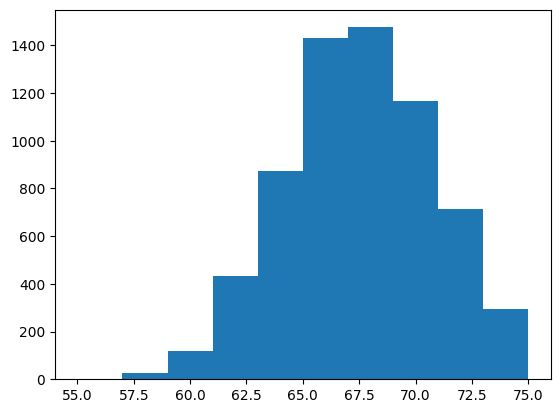

In [11]:
plt.hist(Y)